Analyzing table statistics...
Statistics for table rental:
('sakila.rental', 'analyze', 'status', 'OK')


Adding index on rental.customer_id...
Index added to rental.customer_id


Executing optimized query...
Query executed in 0.0683 seconds


Top 10 most rented films:
   film_id                title     category  total_rentals
0      103   BUCKET BROTHERHOOD       Travel             34
1      738     ROCKETEER MOTHER      Foreign             33
2      331       FORWARD TEMPLE        Games             32
3      767        SCALAWAG DUCK        Music             32
4      489       JUGGLER HARDLY    Animation             32
5      730  RIDGEMONT SUBMARINE          New             32
6      382       GRIT CLOCKWORK        Games             32
7      891       TIMBERLAND SKY     Classics             31
8      735         ROBBERS JOON     Children             31
9      973            WIFE TURN  Documentary             31


Visualizing results...


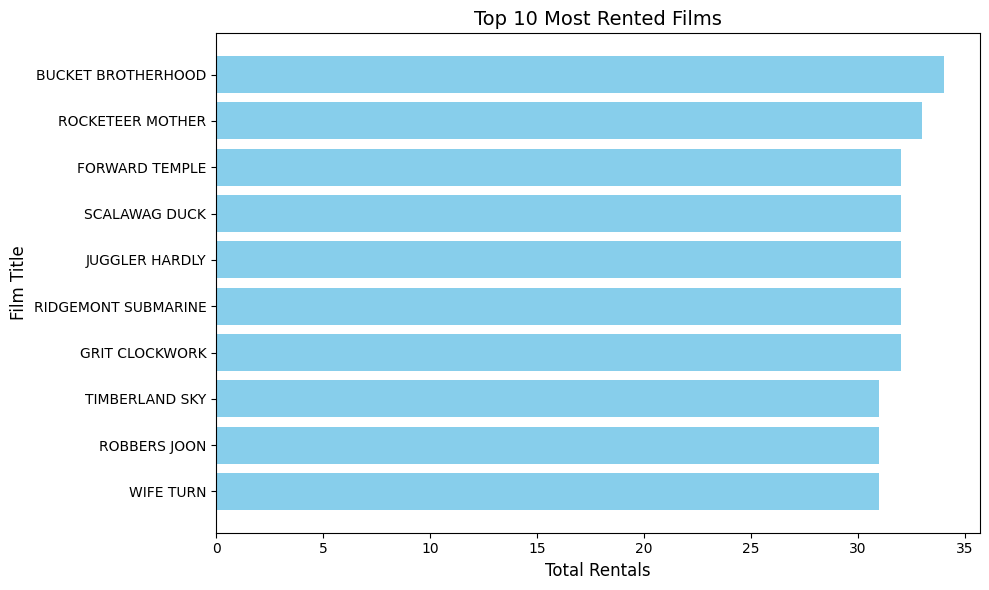

In [2]:
import mysql.connector
import pandas as pd
import time
import matplotlib.pyplot as plt

# Konfigurasi koneksi database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # Ganti dengan password database Anda
    database="sakila"
)

# Fungsi untuk melihat statistik tabel
def analyze_table_stats(table_name):
    cursor = db_connection.cursor()
    query = f"ANALYZE TABLE {table_name};"
    cursor.execute(query)
    print(f"Statistics for table {table_name}:")
    for row in cursor.fetchall():
        print(row)
    cursor.close()

# Fungsi untuk menambahkan indeks jika diperlukan
def add_index(table_name, column_name):
    cursor = db_connection.cursor()
    query = f"ALTER TABLE {table_name} ADD INDEX ({column_name});"
    cursor.execute(query)
    db_connection.commit()
    print(f"Index added to {table_name}.{column_name}")
    cursor.close()

# Fungsi untuk menjalankan query dan mengukur waktu eksekusi
def query_execution_time(query):
    cursor = db_connection.cursor(dictionary=True)
    start_time = time.time()
    cursor.execute(query)
    execution_time = time.time() - start_time
    print(f"Query executed in {execution_time:.4f} seconds")
    result = cursor.fetchall()
    cursor.close()
    return pd.DataFrame(result)

# Contoh tuning pada query
def optimized_query():
    query = """
    SELECT 
        f.film_id, 
        f.title, 
        c.name AS category, 
        COUNT(r.rental_id) AS total_rentals
    FROM film f
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    GROUP BY f.film_id, f.title, c.name
    ORDER BY total_rentals DESC
    LIMIT 10;
    """
    return query_execution_time(query)

# Fungsi untuk membuat visualisasi
def visualize_results(df):
    plt.figure(figsize=(10, 6))
    plt.barh(df['title'], df['total_rentals'], color='skyblue')
    plt.xlabel("Total Rentals", fontsize=12)
    plt.ylabel("Film Title", fontsize=12)
    plt.title("Top 10 Most Rented Films", fontsize=14)
    plt.gca().invert_yaxis()  # Membalikkan sumbu y agar film dengan nilai tertinggi berada di atas
    plt.tight_layout()
    plt.show()

# Main Script
if __name__ == "__main__":
    # 1. Analisis statistik tabel
    print("Analyzing table statistics...")
    analyze_table_stats("rental")
    print("\n")
    
    # 2. Tambahkan indeks pada kolom yang sering digunakan
    print("Adding index on rental.customer_id...")
    add_index("rental", "customer_id")
    print("\n")
    
    # 3. Eksekusi query yang telah dioptimalkan
    print("Executing optimized query...")
    df = optimized_query()
    print("\n")
    
    # 4. Tampilkan hasil
    print("Top 10 most rented films:")
    print(df)
    print("\n")

    # 5. Visualisasi hasil
    print("Visualizing results...")
    visualize_results(df)
    print("\n")
